

# Линейная регрессия

## Часть 1: Приближаем функции


### Метод наименьших квадратов: постановка задачи

Рассмотрим систему уравнений $Xa = y$, в которой $a$ — столбец неизвестных. Её можно переписать в векторном виде
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
где $x_1,\ldots,x_k$ — столбцы матрицы $X$. Таким образом, решить исходную систему означает найти линейную комбинацию векторов $x_1,\ldots,x_k$, равную правой части. Но что делать, если такой линейной комбинации не существует? Геометрически это означает, что вектор $y$ не лежит в подпространстве $U = \langle x_1,\ldots, x_k\rangle$. В этом случае мы можем найти *псевдорешение*: вектор коэффициентов $\hat{a}$, для которого линейная комбинация $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$ хоть и не равна в точности $y$, но является наилучшим приближением — то есть ближайшей к $y$ точкой $\hat{y}$ подпространства $U$ (иными словами, ортогональной проекцией $y$ на это подпростанство). Итак, цель наших исканий можно сформулировать двумя эквивалентными способами:

1. Найти вектор $\hat{a}$, для которого длина разности $|X\hat{a} - y|$ минимальна;
2. Найти ортогональную проекцию $\hat{y}$ вектора $y$ на подпространство $U$ и представить её в виде $X\hat{a}$.

Далее мы будем предполагать, что векторы $x_1,\ldots,x_k$ линейно независимы (если нет, то сначала имеет смысл выделить максимальную линейно независимую подсистему).

На лекциях было показано, что проекция вектора $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$, записывается в виде
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty,$$
и, соответственно, искомый вектор $\hat{a}$ равен
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

### Задача линейной регрессии

Начнём с примера. Допустим, вы хотите найти зависимость среднего балла S студента ФКН от его роста H, веса W, длины волос L и N — количества часов, которые он ежедневно посвящает учёбе. Представьте, что мы измерили все эти параметры для $n$ студентов и получили наборы значений: $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

Теперь мы хотим построить **модель**, т.е. определить алгоритм, который будет принимать на вход некоторый набор параметров (в данном случае это измеренные нами $H, W, L$ и $N$), и выдавать значение некоторой **целевой переменной** (в данном примере это $S$). Тут можно подбирать много разных умных моделей, но начать имеет смысл с самой простой, линейной:

$$S = a_0 + a_1H + a_2W + a_3L + a_4N.$$

Конечно, строгой линейной зависимости нет (иначе можно было бы радостно упразднить экзамены), но мы можем попробовать подобрать коэффициенты $a_0, a_1, a_2, a_3, a_4$, удовлетворяющие вот такому требованию:
$$\sum_{i=1}^n\left(S_i - ( a_0 + a_1H_i + a_2W_i + a_3L_i + a_4N_i)\right)^2 \longrightarrow \min$$
Т.е. мы хотим, чтобы квадрат отклонения правой части от левой был поменьше для всех $n$ студентов. Введём несколько обозначений:
$$X =
\begin{pmatrix}
1 & H_1 & W_1 & L_1 & N_1\\
1 & H_2 & W_2 & L_2 & N_2\\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & H_n & W_n & L_n & N_n
\end{pmatrix}, \qquad a=
\begin{pmatrix}
a_0\\ a_1\\ \vdots\\ a_4
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}.$$

Теперь наше требование выше можно переписать в таком виде:
$$
\sum_{i=1}^n\left(S_i - ( a_0 + a_1H_i + a_2W_i + a_3L_i + a_4N_i)\right)^2 = |y - Xa|^2 \longrightarrow \min
$$

И теперь видно, что мы получили задачу на метод наименьших квадратов!
Решая эту задачу с помощью уже известных формул, получаем оценки коэффициентов $\hat{a}_i$ ($i = 1\ldots,5$).

Теперь проговорим общую постановку задачи линейной регрессии. У нас есть $k$ переменных $x_1,\ldots,x_k$ ("регрессоров"), через которые мы хотим выразить "объясняемую переменную" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k$$
Значения всех переменных мы измерили $n$ раз (у $n$ различных объектов,  в $n$ различных моментов времени - это зависит от задачи). Подставим эти данные в предыдущее равенство:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} = 
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(здесь $x_{ij}$ - это значение $j$-го признака на $i$-м измерении). Это удобно переписать в матричном виде:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} = 
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
или коротко $Xa = y$. Поскольку на практике эта система уравнений зачастую не имеет решения (ибо зависимости в жизни редко бывают действительно линейными), методом наименьших квадратов ищется псевдорешение.

### Оценка качества. Обучение и тест 

После того, как вы построили регрессию и получили какую-то зависимость объясняемой переменной от регрессоров, настаёт время оценить качество регрессии. Есть много разных функционалов качества; мы пока будем говорить только о самом простом и очевидном из них: о среднеквадратичной ошибке (mean square error). Она равна
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2$$

В целом, хочется искать модели с наименьшей mean square error на имеющихся данных. Однако слишком фанатичная гонка за минимизацией ошибки может привести к печальным последствиям, в чём Вам предстоит убедиться в ходе выполнения этой лабораторной.

Чтобы не попадать в эту ловушку, данные обычно делят на обучающие (по которым строят модель и оценивают коэффициенты) и тестовые. Лучшей стоит счесть ту модель, для которой значение функционала качества будет меньше.

### Правила оформления графиков
При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. 

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это надстройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

При выполнении этой лабораторной Вы столкнётесь с необходимостью рисовать большое количество графиков. Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — Ваша фамилия.

### Задание 1. Метод наименьших квадратов (3.1 баллов)

**ВАЖНО! В этом задании вам нельзя использовать циклы (в том числе рекурсии, генераторы и конструкции вида map/reduce), кроме цикла в задании 1.5, который мы вам оставили. За наличие цикла в вашем коде мы поставим вам не более половины от стоимости задания.**

Скачайте файлы ``train.txt`` и ``test.txt``. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом — некоторое число точек (значения аргумента $x$), во втором — значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Функцию $f$ мы вам не скажем. Ваша задача — по данным из файла ``train.txt`` (будем называть их обучающей выборкой) подобрать функцию $y = g(x)$, пристойно приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (из файла ``test.txt``).

In [ ]:
import numpy as np
from os.path import join
import matplotlib.pyplot as plt
from numpy.linalg import inv

PATH = "./" ### Вставить заглушку (не забудьте ввести правильный путь!)

data_train = np.loadtxt(join(PATH, "train.txt"), delimiter=',')
data_test = np.loadtxt(join(PATH, "test.txt"), delimiter=',')

**0. [0 баллов]** Разделим значения $x$ и $y$

In [ ]:
X_train = data_train[:,0]
y_train = data_train[:,1]

# Сделайте то же для тестовой выборки
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_test = data_test[:,0]
y_test = data_test[:,1]

#Сделаем то же самое для точек из двух сборок
X_all_dots = np.concatenate((X_test.T, X_train.T), axis=0).T
y_all_dots = np.concatenate((y_test.T, y_train.T), axis=0).T

**1. [0,15 балла]** Найдите с помощью метода наименьших квадратов линейную функцию $y = kx + b$, наилучшим образом приближающую неизвестную зависимость. Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``). Напечатайте этот многочлен в виде $kx+b$.

In [ ]:
#прямая для точек из train

x_train_line = np.concatenate(([np.ones(X_train.size)], [X_train]), axis=0).transpose()
line_coef_train = np.linalg.inv(x_train_line.transpose().dot(x_train_line)).dot(x_train_line.transpose()).dot(y_train)
print("y = kx + b")
print("y = " + str(line_coef_train[1]) + " * x + " + str(line_coef_train[0]))

y = kx + b
y = 4.048356078106742 * x + 2.453932233062655


**2. [0,15 балла]** Нарисуйте на плоскости точки $(x_i, y_i)$ из обеих выборок и полученную линейную функцию.

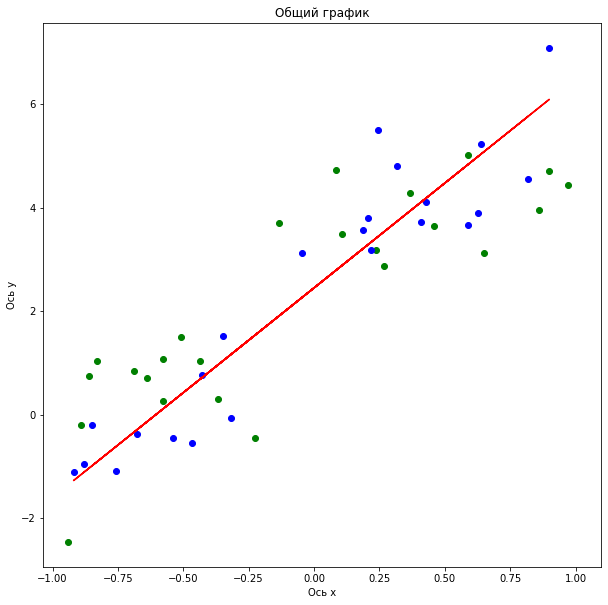

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

fig, ax = plt.subplots()
plt.xlabel("Ось x")
plt.ylabel("Ось y")
plt.title("Общий график")
fig.set_size_inches(10, 10)
y_train_line = line_coef_train[1] * x_train_line + line_coef_train[0]
plt.plot(x_train_line, y_train_line, color="r", label='train')
ax.scatter(X_test, y_test, color="g")
ax.scatter(X_train, y_train, color="b")




**3. [0,4 балла]** Глядя на данные, подумайте, многочленом какой степени можно было бы лучше всего приблизить эту функцию с точки зрения минимизации среднеквадратичной ошибки на обучающей выборке. Найдите этот многочлен и сохраните его коэффициенты в массив `poly_coef` (от младшего члена к старшему). Обязательно обоснуйте выбор степени многочлена.

Так как всего у нас 24 точки в обучающей выборке, значит существует многолен (например, Лагранжа) степени не больше 23, который проходит по всем точкам из обучающей выборки, значит среднеквадратичная ошибка будет равна 0. Найдем этот многочлен.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
intermediate_p = np.matrix(np.sort(X_train.copy())).T.dot(np.matrix(np.ones(23)))
x_train_poly = np.power(intermediate_p, np.arange(23))

In [ ]:
zip_x_y = list(zip(X_train, y_train))
x_sort, y_sort = zip(*sorted(zip_x_y, key = lambda x: x[0]))
y_sort = np.array(list(y_sort))
x_sort = np.array(list(x_sort))

poly_coef = (inv((x_train_poly.T).dot(x_train_poly)).dot(x_train_poly.T)).dot(y_sort)
y_res = ((x_train_poly.dot(inv((x_train_poly.T).dot(x_train_poly)))).dot(x_train_poly.T)).dot(y_sort).A1
y_train_poly = x_train_poly.dot(poly_coef.T)

print(poly_coef)

[[ 8.96160103e-01 -1.06752450e+02 -4.81907551e+02  1.06620839e+04
   1.45383018e+04 -2.70081777e+05 -2.00627534e+05  3.18823502e+06
   1.86241455e+06 -2.05681437e+07 -1.18160661e+07  7.60781230e+07
   4.67264888e+07 -1.57193938e+08 -1.04618978e+08  1.51028675e+08
   1.06626035e+08  9.00395095e+06  1.30902847e+07 -1.31539894e+08
  -1.13947258e+08  7.17446601e+07  6.38027075e+07]]


**4. [0,15 балла]** Нарисуйте его график на одном чертеже вместе с точками $(x_i, y_i)$ из обеих выборок. Удалось ли графику пройти через все точки из выборки? Попробуйте объяснить, почему?

График проходит далеко не через все точки, потому что в poly_coef у нас большие степени $\approx 10^7$, а $x_i$ маленькие $\approx 10^{-1}$, соответственно, возводя, $x_{i}$ в большую степень (10-22) мы получаем маленькие числа. А значит при умножении больших коэффициентов poly_coef на маленькие числа мы получаем неточные значения $y_i$. 

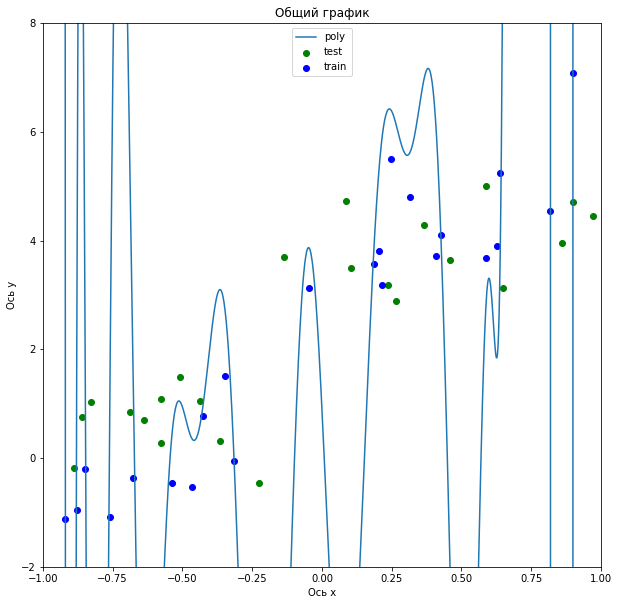

In [ ]:
fig, ax = plt.subplots()
plt.xlabel("Ось x")
plt.ylabel("Ось y")
plt.title("Общий график")


plt.xlim(-1, 1)
plt.ylim(-2, 8)
fig.set_size_inches(10, 10)
x = np.linspace(-10, 10, 10000)
poly_coef = np.array(poly_coef)
y = np.polyval(poly_coef.T[::-1], x)
plt.plot(x, y, label="poly")
ax.scatter(X_test, y_test, color="g", label="test")
ax.scatter(X_train, y_train, color="b", label="train")
ax.legend()


**5. [0,5 балла]** Для $k = 1,2,3,\ldots,10$ найдите многочлен $\hat{f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость. Сохраните найденные коэффициенты многочленов в матрицу `poly_coefs` (коэффициенты многочлена степени $j$ должны быть сохранены в $j$-й строке матрицы от младшего члена к старшему).

In [ ]:
poly_coefs_train = np.zeros((10, 11))
poly_coefs_test = np.zeros((10, 11))
poly_coefs_all_dots = np.zeros((10, 11))

for k in range(10):
  intermediate_train = np.matrix(X_train.copy()).T.dot(np.matrix(np.ones(k + 2)))
  x_train_k = np.power(intermediate_train, np.arange(k + 2))
  line_coef_train = np.linalg.inv(x_train_k.transpose().dot(x_train_k)).dot(x_train_k.transpose()).dot(y_train)
  line_coef_train = np.concatenate((line_coef_train, np.matrix(np.zeros(9 - k))), axis=1)
  poly_coefs_train[k] = line_coef_train

print("Коэффициенты полиномов для train при k = 1, 2, ..., 10")
print(poly_coefs_train)


# Простая проверка, что матрица poly_coefs имеет столько строк, сколько нужно
assert poly_coefs_train.shape[0] == 10 and poly_coefs_test.shape[0] == 10

Коэффициенты полиномов для train при k = 1, 2, ..., 10
[[   2.45393223    4.04835608    0.            0.            0.
     0.            0.            0.            0.            0.
     0.        ]
 [   2.5694219     4.01015943   -0.3551553     0.            0.
     0.            0.            0.            0.            0.
     0.        ]
 [   2.54688319    4.7869345    -0.41165762   -1.41634742    0.
     0.            0.            0.            0.            0.
     0.        ]
 [   3.25302411    4.49788737   -6.92753076   -0.76232916    7.97572932
     0.            0.            0.            0.            0.
     0.        ]
 [   3.11521784    6.42425264   -6.36050064  -11.18097856    7.592385
    10.50504691    0.            0.            0.            0.
     0.        ]
 [   3.07558089    6.47067818   -5.70379442  -11.41476149    5.49711076
    10.73774703    1.6944096     0.            0.            0.
     0.        ]
 [   3.14869778    5.21297457   -5.66934112    1.3353

**6. [0,6 балл]** Для каждого из многочленов из задания 1.5, а также для многочлена из задания 1.4 найдите среднеквадратическую ошибку на обучающих данных и на тестовых данных: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$. Полученные значения ошибок сохраните в матрицу `errors` высоты 11 и ширины 2. В первом столбце матрицы должны стоять значения ошибок на тренировочных данных, во втором --- на тестовых. В первых 10 строках матрицы должны стоять значения ошибок для многочленов соответствующих степений из задания 1.5, в 11-й строке --- значение ошибки для многочлена из задания 1.4.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

def error(X_data, y_data, poly_coef, deg, need, n):
   X_right = np.power(np.matrix(X_data).T.dot(np.matrix(np.ones(deg))), np.arange(deg))
   f_k = X_right.dot(np.matrix(poly_coef).T)
   y = np.matrix(y_data).T.dot(np.matrix(np.ones(need)))
   return np.sum(np.multiply((f_k - y), (f_k - y)), axis=0) / n

er_train_10 = error(X_train, y_train, poly_coefs_train, 11, 10, 24)
er_test_10 = error(X_test, y_test, poly_coefs_train, 11, 10, 23)

er_train_23 = error(X_train, y_train, poly_coef, 23, 1, 24)
er_test_23 = error(X_test, y_test, poly_coef, 23, 1, 23)

str_23 = np.concatenate((np.matrix(er_train_23[0, 0]), np.matrix(er_test_23[0, 0])), axis=1)

errors = np.concatenate((er_train_10.T, er_test_10.T), axis=1)
errors =  np.concatenate((errors, str_23), axis=0)

print(errors)

[[6.71707897e-01 1.72101046e+00]
 [6.63159881e-01 1.63679699e+00]
 [6.26426150e-01 1.54639482e+00]
 [4.34115225e-01 2.35060578e+00]
 [3.54558256e-01 2.52105175e+00]
 [3.54213794e-01 2.60029867e+00]
 [3.40059279e-01 3.32411131e+00]
 [3.37767809e-01 3.74917719e+00]
 [3.24182964e-01 5.49063984e+00]
 [3.18918394e-01 8.34036360e+00]
 [3.09403169e+00 3.47926180e+10]]


**7. [0,5 балла]** Для $k = 1,2,3,4,6$ нарисуйте графики полученных многочленов на одном чертеже вместе с точками $(x_i, y_i)$ из обеих выборок (возможно, график стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

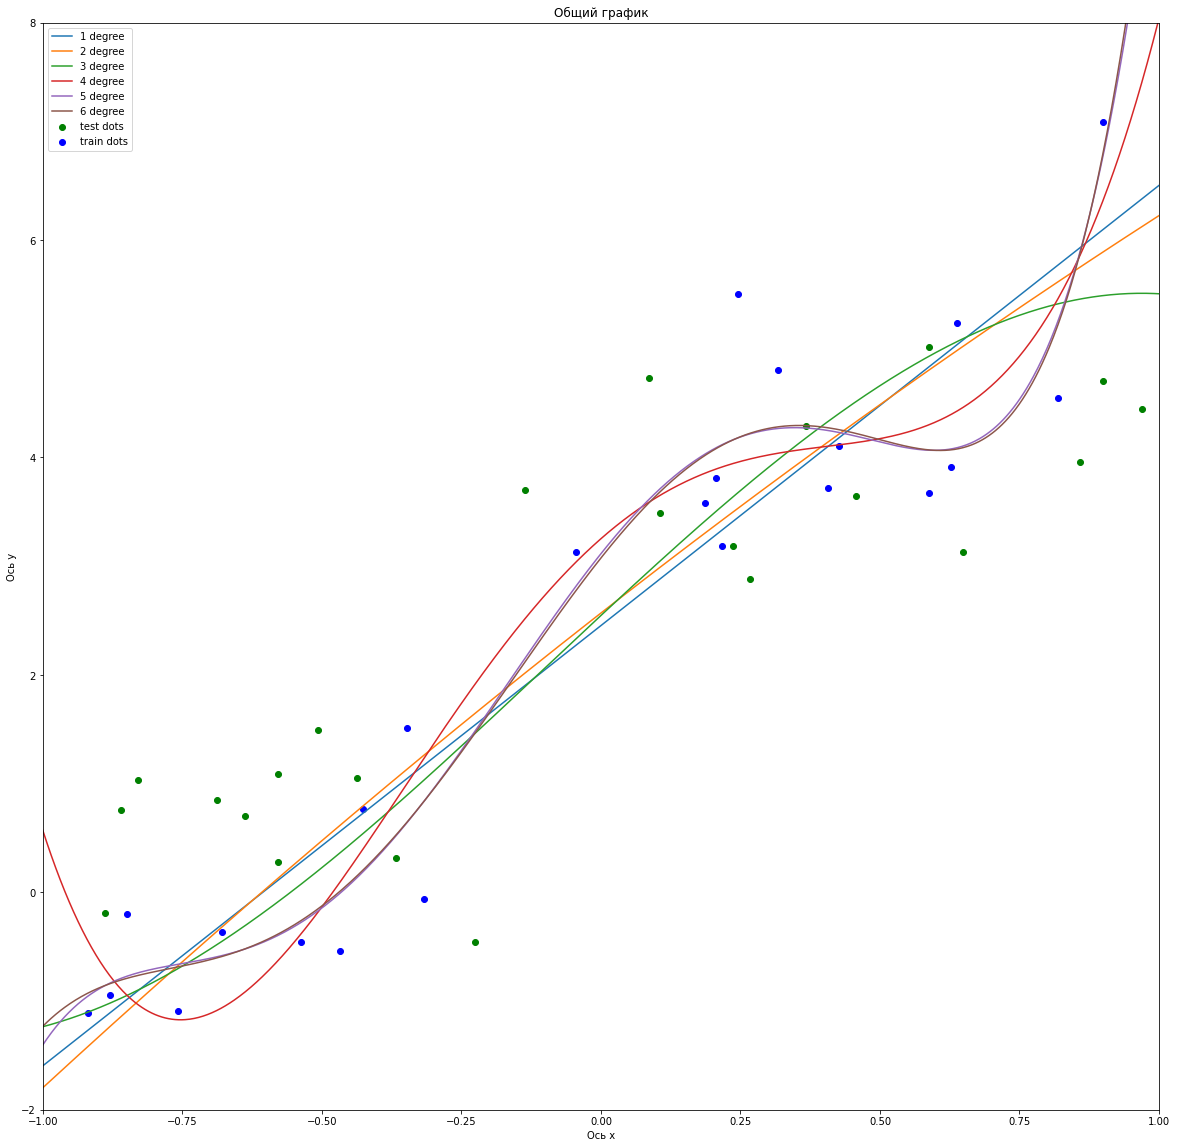

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
fig, ax = plt.subplots()
plt.xlabel("Ось x")
plt.ylabel("Ось y")
plt.title("Общий график")


plt.xlim(-1, 1)
plt.ylim(-2, 8)
fig.set_size_inches(20, 20)
x = np.linspace(-10, 10, 10000)


poly_coef = np.array(poly_coefs_train[0])
y_1 = np.polyval(poly_coef.T[::-1], x)
plt.plot(x, y_1, label="1 degree")

poly_coef = np.array(poly_coefs_train[1])
y_2 = np.polyval(poly_coef.T[::-1], x)
plt.plot(x, y_2, label="2 degree")

poly_coef = np.array(poly_coefs_train[2])
y_3 = np.polyval(poly_coef.T[::-1], x)
plt.plot(x, y_3, label="3 degree")

poly_coef = np.array(poly_coefs_train[3])
y_4 = np.polyval(poly_coef.T[::-1], x)
plt.plot(x, y_4, label="4 degree")

poly_coef = np.array(poly_coefs_train[4])
y_5 = np.polyval(poly_coef.T[::-1], x)
plt.plot(x, y_5, label="5 degree")

poly_coef = np.array(poly_coefs_train[5])
y_6 = np.polyval(poly_coef.T[::-1], x)
plt.plot(x, y_6, label="6 degree")

ax.scatter(X_test, y_test, color="g", label="test dots")
ax.scatter(X_train, y_train, color="b", label="train dots")

ax.legend()


**8. [0,65 балла]** Что происходит с ошибкой на тестовых данных при росте степени многочлена? Казалось бы, чем больше степень, тем более сложным будет многочлен и тем лучше он будет приближать нашу функцию. Подтверждают ли это ваши наблюдения? Как вам кажется, чем объясняется поведение ошибки на тестовых данных при $k = 10$? Как называется наблюдаемый вами эффект?

**Ответ:** ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

При росте степени многочлена наша модель переобучается и подстраивает коэффициенты многочлена под данные из обучающей выборке. Но данные из тестовой выборки отличаются от обучающей, а значит многочлен "персонализирован" для определенный данныч => с ростом степени ошибка на тестовых данных будет расти

## Часть 2: Обучаем машины

### Задание 2. Линейная регрессия (3 балла)

В этом задании вам предстоит заняться предсказанием цен на алмазы. Скачайте файл `diamonds_features.csv`, содержащий данные, с которыми вам предстоит работать. Запустите следующую ячейку:

In [ ]:
import numpy as np
import numpy as np
from os.path import join
import matplotlib.pyplot as plt
from numpy.linalg import inv

data = np.loadtxt("diamonds_features.csv", delimiter=",", dtype="str")[1:, :]
print(data[:5, :])

[['0.8' 'Ideal' 'F' 'VS1' '62.4' '55.0' '5.92' '5.88' '3.68' '3884']
 ['0.91' 'Premium' 'F' 'SI2' '61.4' '60.0' '6.23' '6.21' '3.82' '3618']
 ['1.28' 'Premium' 'I' 'VS2' '61.7' '60.0' '7.05' '6.95' '4.32' '6762']
 ['0.41' 'Very Good' 'F' 'SI1' '61.9' '55.0' '4.78' '4.81' '2.97' '769']
 ['1.07' 'Premium' 'F' 'SI2' '61.8' '59.0' '6.53' '6.57' '4.05' '4560']]


Мы вывели для вас первые 5 строчек данных. Описания значений в колонках вы можете найти в файле `diamonds_descriptions.txt`.

Глобально в этом задании вам предстоит научиться строить модель линейной регрессии для предсказания цены алмаза по его признакам. Данные устроены таким образом, что в каждой строчке располагаются признаки, описывающие объект (алмаз), а в каждой фиксированной колонке --- всевозможные значения конкретного признака для всех объектов в данных.

**0. [0 баллов]** Разделите выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели датасета упорядочили объекты); рекомендуем вам для этого функцию [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) с параметром `test_size=0.3`. Обязательно зафиксируйте параметр `random_state`.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(data, test_size=0.3, random_state=230)

In [ ]:
X_train


array([['0.41', 'Premium', 'F', ..., '4.77', '2.93', '863'],
       ['0.41', 'Good', 'F', ..., '4.71', '3.01', '904'],
       ['0.91', 'Very Good', 'F', ..., '6.15', '3.81', '4049'],
       ...,
       ['1.2', 'Premium', 'I', ..., '6.72', '4.22', '5699'],
       ['0.71', 'Good', 'D', ..., '5.76', '3.3', '2015'],
       ['0.8', 'Premium', 'D', ..., '5.89', '3.72', '3441']], dtype='<U9')

In [ ]:
X_test

array([['1.09', 'Good', 'H', ..., '6.53', '4.16', '5010'],
       ['1.76', 'Ideal', 'G', ..., '7.77', '4.8', '10896'],
       ['0.5', 'Very Good', 'E', ..., '5.03', '3.21', '1629'],
       ...,
       ['0.81', 'Ideal', 'G', ..., '6.02', '3.73', '3192'],
       ['0.7', 'Good', 'H', ..., '5.6', '3.58', '1697'],
       ['1.01', 'Very Good', 'G', ..., '6.34', '4.02', '7565']],
      dtype='<U9')

Теперь у вас есть две выборки, каждая из которых содержит случайное подмножество наших данных. Обучающую выборку мы в дальнейшем будем использовать для обучения модели линейной регрессии, а тестовую, соответственно, для теста.

**ВАЖНО: за обучение модели на тестовой выборке будем ставить 0 за весь пункт!**

### Работаем с числовыми данными

Сейчас ваши данные содержат как привычные вам числовые признаки, описывающие объект, так и категориальные признаки, которые описывают принадлежность объекта к той или иной категории, и в данных представляются строками. Что делать с данными, которые представлены строками --- мы разберёмся чуть позже, а пока давайте забудем, что они у нас есть, и будем работать только с числовыми.

**0,5. [0 баллов]** Заполните переменные `numeric_features` и `categorical_features` индексами столбцов в данных, содержащих числовые и категориальные признаки соответственно. После этого можно проверить, что массив `data[:, numeric_features]` содержит только числовые данные.

In [ ]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
numeric_features = [0, 4, 5, 6, 7, 8, 9]
categorical_features = [1, 2, 3]
print("numeric:")
print(data[:, numeric_features])
print(" ")
print("categorial:")
print(data[:, categorical_features])

numeric:
[['0.8' '62.4' '55.0' ... '5.88' '3.68' '3884']
 ['0.91' '61.4' '60.0' ... '6.21' '3.82' '3618']
 ['1.28' '61.7' '60.0' ... '6.95' '4.32' '6762']
 ...
 ['0.31' '61.4' '56.0' ... '4.41' '2.7' '609']
 ['0.36' '62.0' '59.0' ... '4.51' '2.81' '807']
 ['0.31' '59.0' '62.0' ... '4.43' '2.61' '755']]
 
categorial:
[['Ideal' 'F' 'VS1']
 ['Premium' 'F' 'SI2']
 ['Premium' 'I' 'VS2']
 ...
 ['Ideal' 'H' 'VVS2']
 ['Premium' 'F' 'VS2']
 ['Ideal' 'G' 'VVS1']]


**1. [0,3 баллов]** Решите задачу линейной регрессии для предсказания цены алмаза по его числовым признакам (не забудьте, что линейная модель должна также содержать свободный от признаков член) и протестируйте ваше решение на тестовых данных. Выведите полученные регрессионные коэффициенты для каждого признака. Попробуйте проинтерпретировать полученные коэффициенты: сравните их друг с другом, посмотрите на их знаки и на абсолютную величину и попробуйте на основе этого придать им житейский смысл. Согласуется ли построенная интерпретация модели с вашими представлениями о жизни? 

*Примечание: обратите внимание, сейчас все данные у вас хранятся в строковом виде. Чтобы работать с ними как с числами, необоходимо явно привести их к типу float. В NumPy для этого есть специальная удобная команда astype.*

In [ ]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
numeric_features_withoit_cost = [0, 4, 5, 6, 7, 8]

numer_train = X_train[:, numeric_features_withoit_cost]



a, b = numer_train.shape

one_train = np.matrix(np.ones(a))


numer_train = np.concatenate((one_train.T, numer_train), axis=1).astype(float)
cost_train = X_train.T[numeric_features[-1]].astype(int)

poly_coef = (inv((numer_train.T).dot(numer_train)).dot(numer_train.T)).dot(cost_train)
y_res_train = numer_train.dot(poly_coef.T)

error_train = np.sum((y_res_train.A1 - cost_train) * (y_res_train.A1 - cost_train)) / a

print(error_train)


2221637.226418197


In [ ]:
print(poly_coef)

[[ 1.99987385e+04  1.08396198e+04 -1.95221969e+02 -9.48497549e+01
  -3.48500549e+03  2.23827203e+03 -1.97781289e+01]]


In [ ]:
#Протестируем полином на тестовых данных

numer_test = X_test[:, numeric_features_withoit_cost]

a, b = numer_test.shape
one = np.matrix(np.ones(a))

numer_test = np.concatenate((one.T, numer_test), axis=1).astype(float)

cost_test = X_test.T[numeric_features[-1]].astype(int)

y_res_test = numer_test.dot(poly_coef.T)
error = np.sum((y_res_test.A1 - cost_test) * (y_res_test.A1 - cost_test)) / a
print(error)

3386635.234435272


Интерпретация модели здесь: ╰( ͡° ͜ʖ ͡° )つ──☆*:・

Второй коэффициент отвечает за количество карат и его порядок $\approx 10^4$ что похоже на правду, так как алмазы бывают максимум 25-каратные, значит в выборке очень много чисел первого порядка, а карат - это одно из основополающего цены. 

Третий коэффициент - общий процент глубины = -195. Наверное, чем брилиант уже, тем он дороже, почему бы и нет?

Четвертый коэффициент отвечает за ширину вершины ромба относительно самого широкого места. Он равен $\approx -90$, что наверное совпадает с моим ожиданием, сложно объянить почему))

Далее все коэф отвечают за длину, ширину и глубину = (-3485  2238 -19) тут вообще нет никакой логики на мой взгяд, потому что чем алмаз больше, тем он должен больше стоить, то есть коэфф должны быть положительны, как минимум.


Если вы всё сделали правильно, у вас должны были получиться довольно большие по абсолютной величине коэффициенты.

**2. [0,15 баллов]** Попробуйте объяснить, почему ситуация, когда модель имеет большие по модулю коэффиценты, нежелательна?

Подсказка: Вы можете попытаться проиллюстрировать свои рассуждения, искусственно описав с помощью исследуемых признаков два алмаза, которые по вашему мнению должны иметь одинаковую цену, и проверить, выдаст ли построенная модель близкие предсказания на этих объектах.

In [ ]:
#Первый алмаз -  0.3	Very Good	G	VS1	63.1	58.0	4.28	4.24	2.69	776
#Второй алмаз - 0.3	Premium	H	VVS2	61.5	58.0	4.3	4.28	2.64	776
first = [1, 0.3, 63.1,	58.0,	4.28,	4.24,	2.69]
second = [1, 0.3,	61.5,	58.0,	4.3,	4.28,	2.64]

In [ ]:
first = np.matrix(first)
print("Цена первого алмаза из полинома = " + str(first.dot(poly_coef.T).A1))

second = np.matrix(second)
print("Цена второго алмаза из полинома = " + str(second.dot(poly_coef.T).A1))
print("Цена алмазов реальная = 776")

Цена первого алмаза из полинома = [-47.92087736]
Цена второго алмаза из полинома = [285.25395068]
Цена алмазов реальная = 776


Ваше обоснование здесь: ╰( ͡° ͜ʖ ͡° )つ

Заметим, что числовые характеристики этих двух алмазов очень схожи и отличаются по каждому параметру менее, чем на 5 процентов, причем цена алмазов одинаковая. Но по итогу, если их подставить в наш полином получим, что один алмаз стоит отрицательное количество денег, а другой около 300, что, конечно, не похоже на правду. Данный "прикол" получается из-за большого порядка коэффициентов полинома и небольших величин некоторых характеристик. По итогу мы умножаем небольшие отклонения на большие коэффициенты из-за чего получаем такую большую разницу в цене.

──☆*:・

**3. [0.2 баллов]** Нарисуйте гистограмму, характеризующую распределение объясняемой переменной в обучающей выборке. На такой диаграмме по оси `x` должны быть сгруппированные значения объясняемой переменной, а по оси `y` --- количество объектов выборки с таким значением. Столбцов на вашем графике должно быть не менее 50.

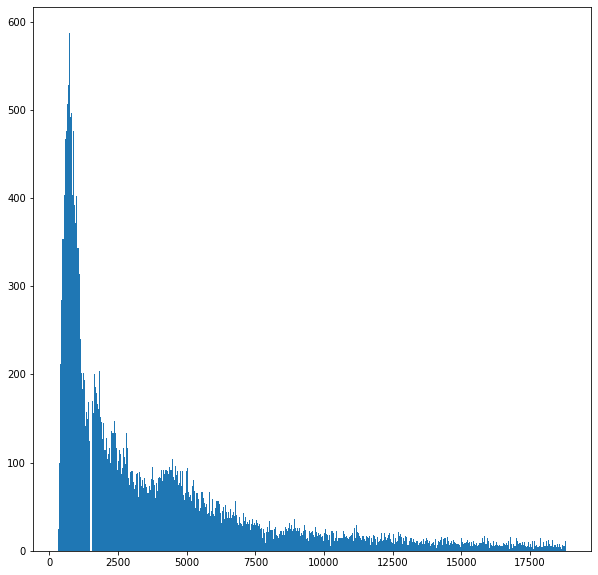

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

fig, ax = plt.subplots()

fig.set_size_inches(10, 10)
hist, bins, _ = plt.hist(cost_train, bins=500)
plt.show()



В левой части гистограммы располагаются небольшие значения целевой переменной, и объектов с таким значением в выборке довольно много (не забываем, что у нас тут не абстрактная математика в вакууме, мы тут цену алмазов предсказываем!); с увеличением значения таргета (целевой переменной) количество соответствующих объектов в выборке убывает. Сначала число объектов убывает довольно стремительно, но с некоторого момента разница в высоте между соседними столбцами уже почти незаметна. Такое явление называется "распределение с тяжёлым хвостом", и оно не очень желательно при построении модели.

Попробуем избавиться от тяжёлого хвоста. Для этого нужно применить к таргету какую-нибудь медленнорастущую биективную функцию, например логарифм. 

<!-- Однако вспомним, что мы намеренно отмасштабировали таргет таким образом, чтобы среди его значений был 0, поэтому нужно придумать ещё какое-то преобразование, чтобы все значения целевой переменной попали в область определения логарифма. -->

**4. [0,25 баллов]** Прологарифмируйте целевую переменную и нарисуйте график распределения логарифмированного таргета. Сильно ли он отличается от предыдущего графика? Попробуйте объяснить, почему явление "распределения с тяжёлым хвостом" нежелательно при построении модели.

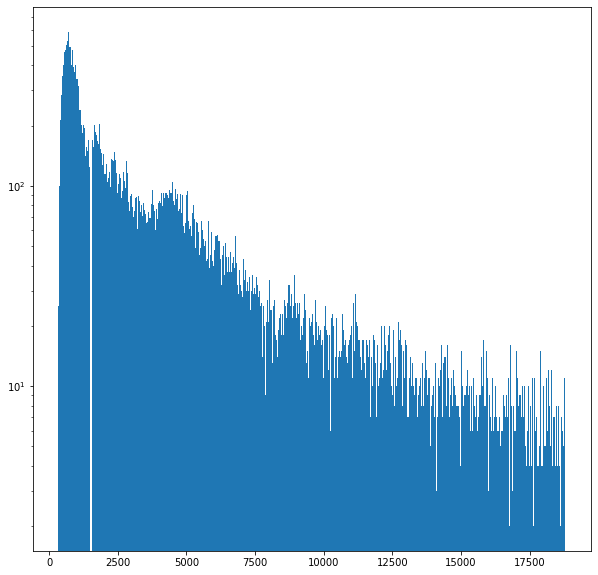

In [ ]:
fig, ax = plt.subplots()

fig.set_size_inches(10, 10)
hist, bins, _ = plt.hist(cost_train, bins=500)
plt.yscale('log')
plt.show()

Ваше обоснование здесь: ╰( ͡° ͜ʖ ͡° )つ──☆*:・

распределения с тяжёлым хвостом нежелательно, потому, что при таком распределение мы имеем большой разброс по x и бОльшая часть объектов сосредоточена на каком-то небольшом участке. Например, как в этой лабе) На хвосте мы уже не понимаем какое количество объектов, где сосредоточено. Тем более, если мы будем сравнивать эту выборку с какой-то другой выборкой, мы получим два графика, которые внешне могут быть одинаковы, но соотношение величин на хвосте этих двух графиков могут отличаться в несколько(а на каких-то других эксперементая и в миллионы) раз. 

Таким образом, удобно использовать логарифмическую шкалу. Она позволяет показывать на гистограме большой разброс по X, к тому же мы болле наглядно видим ситуацию по y. А значит при сравнении двух различных гистограмм, нам будет гораздо проще брать отношение игреков на заданных отрезках.

Снова обучите линейную модель, считая целевой переменной логарифмированный таргет. Помните, что чтобы протестировать полученную линейную модель, важно взять экспоненту от полученных предсказаний.

In [ ]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


Удалось ли добиться лучшего качества?

Ответ: ╰( ͡° ͜ʖ ͡° )つ──☆*:・

### Работаем с категориальными признаками

До сих пор мы работали с данными, которые представляются числами. Однако часто в датасетах объекты описываются не только признаками, содержащими числа, но и строковыми признаками, определяющими принадлежность объекта к некоторой категории. Такие признаки называются категориальными. Важно не выкидывать их из модели, потому что часто они содержат довольно полезную информацию об объекте, которую хорошая модель должна обязательно учитывать.

В этом разделе мы будем рассматривать только категориальные признаки, временно забыв про числовые.

Естесственно, нам нужно придумать, как закодировать категориальные признаки числами. Есть довольно много подходов к такой кодировке, но мы рассмотрим два самых базовых. Первая мысль, которая приходит в голову такая: давайте занумеруем все категории фиксированного признака, и заменим их строковое представление соответствующим численным.

**5. [0,3 баллов]** Реализуйте описанную выше процедуру кодирования для всех категориальных признаков в выборке. Вы можете сделать это самостоятельно, а можете разобраться в классе `OrdinalEncoder` библиотеки `sklearn`. Обучите линейную модель на закодированных категориальных признаках и протестируйте. 

In [ ]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
categorical_features = [1, 2, 3]
cater_train = X_train[:, categorical_features]
hight, width = cater_train.shape
one = np.matrix(np.ones(hight))


categoric = OrdinalEncoder(categories=[["Fair", "Good", "Very Good", "Premium", "Ideal"], ["J", "I", "H", "G", "F", "E", "D"], ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]])

cat_train = categoric.fit_transform(cater_train)
cat_train = np.concatenate((one.T, cat_train), axis=1)

cost_train = X_train.T[[-1]].astype(int)

poly_coef_categoric = (inv((cat_train.T).dot(cat_train)).dot(cat_train.T)).dot(cost_train.T)

print(poly_coef_categoric)



[[6713.45065265]
 [-105.30792915]
 [-424.19399242]
 [-333.06647819]]


In [ ]:
cater_test = X_test[:, categorical_features]
cater_test = categoric.fit_transform(cater_test)

one_1 = np.matrix(np.ones(cater_test.shape[0]))

cater_test = np.concatenate((one_1.T, cater_test), axis=1)

print(cater_test)

cost_test = X_test.T[[-1]].astype(int)

y_cat_test = cater_test.dot(poly_coef_categoric)

error_test = np.sum((y_cat_test.A1 - cost_test) * (y_cat_test.A1 - cost_test)) / cater_test.shape[0]

print(error_test)

[[1. 1. 2. 2.]
 [1. 4. 3. 2.]
 [1. 2. 5. 3.]
 ...
 [1. 4. 3. 2.]
 [1. 1. 2. 1.]
 [1. 2. 3. 5.]]
14760907.544451576


Подумайте, в чём потенциальные проблемы такого кодирования? (Подсказка: пусть изначально мы закодировали категорию A числом 1, а категорию B числом 2, а потом решили сделать наоборот: A <-> 2, B <-> 1. Подумайте, может ли измениться качество модели? А должно ли?)

Ваше обоснование здесь: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Ну вообще мне не нравится такой метод кодировки признаков, потому что на каждый категориальный признак мы получаем 1 коэффициент, а значит мы вообще получаем не пойми что. То есть, во-первых, мы получаем какие-то странные коэффициенты, которые четко говорят что одна ["Fair", "Good", "Very Good", "Premium", "Ideal"] "Fair" в два раза хуже "Good" и т д Но на самом деле, может "Fair" и "Good" это почти одно и тоже и отношение "Ideal" к "Fair" = 100, например.  Тем более, если мы поменяем кодировку, как описано в условии выше, мы получим какие-то другие коэфф-ты и отношения качества A к B станет не 2 к 1, а 1 к 2. В общем, странный метод кодировки)

С другой стороны мы получаем небольшие коэффициенты в полиноме, что, конечно, является плюсом.

Теперь давайте попробуем исправить недочёты такого способа кодирования категориальных признаков, придумав другой метод. Пусть некоторый признак имеет 4 различные категории: {A, B, C, D}. Заменим этот признак на 4 бинарных признака. Каждый из новых признаков будет являться индикатором одной из этих четырёх категорий: если некоторый объект имел категорию A, то после нашего кодирования значение признака, соответствующего категории А у этого объекта будет равно $1$, а значения оставшихся трёх признаков будут $0$. Небольшая иллюстрация: пусть так выглядела выборка до кодирования

| Объект | Признак |
| :----------:|:-:|
| X | "B" |
| Y | "D" |

А так будет выглядеть после кодирования:

| Объект | Признак == "A" | Признак == "B" | Признак == "C" | Признак == "D" |
| :----------:|:-:|:-:|:-:|:-:|
| X | 0 | 1 | 0 | 0 |
| Y | 0 | 0 | 0 | 1 |


**6. [0,3 баллов]** Реализуйте описанную выше процедуру кодирования для всех категориальных признаков в выборке. Вы можете сделать это самостоятельно, а можете разобраться в классе `OneHotEncoder` библиотеки `sklearn`. Обучите линейную модель на закодированных категориальных признаках и протестируйте. 

In [ ]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
categorical_features = [1, 2, 3]
cater_train = X_train[:, categorical_features]
hight, width = cater_train.shape
one = np.matrix(np.ones(hight))


categoric_hot = OneHotEncoder(sparse=False, categories=[["Fair", "Good", "Very Good", "Premium", "Ideal"],
                                                    ["J", "I", "H", "G", "F", "E", "D"],
                                                    ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]])

cat_train = categoric_hot.fit_transform(cater_train)
cat_train = np.concatenate((one.T, cat_train), axis=1)

cost_train = X_train.T[[-1]].astype(int)

poly_coef_categoric_encode = (inv((cat_train.T).dot(cat_train)).dot(cat_train.T)).dot(cost_train.T)

print("poly:")
print(poly_coef_categoric_encode.T)

print("categoric:")
print(cat_train)


poly:
[[ 9.64285329e+20 -1.66558375e+21 -1.66558375e+21 -1.66558375e+21
  -1.66558375e+21 -1.66558375e+21  7.01298421e+20  7.01298421e+20
   7.01298421e+20  7.01298421e+20  7.01298421e+20  7.01298421e+20
   7.01298421e+20  1.05181709e+05  1.77423260e+05  7.39461978e+04
   3.06664032e+04  8.95285342e+04  6.15325714e+04  4.85791688e+04
   8.97344318e+04]]
categoric:
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [ ]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

cater_test = X_test[:, categorical_features]
cater_test = categoric_hot.fit_transform(cater_test)

one_1 = np.matrix(np.ones(cater_test.shape[0]))

cater_test = np.concatenate((one_1.T, cater_test), axis=1)

print("test:")
print(cater_test)

cost_test = X_test.T[[-1]].astype(int)

y_cat_test = cater_test.dot(poly_coef_categoric_encode)

error_test = np.sum((y_cat_test.A1 - cost_test) * (y_cat_test.A1 - cost_test)) / cater_test.shape[0]

print("error on test:")
print(error_test)

test:
[[1. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]]
error on test:
8217462502.019345


Подумайте, в чём потенциальные проблемы такого кодирования? Какие недочёты прошлого метода кодирования исправляет предложенный способ? Какие недочёты есть у этого метода кодирования, которых нет у предыдущего? Который из двух методов выдаёт лучшее качество?

Ваше обоснование здесь: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

В целом, есть 2 проблемы кодирования

1) Матрица с признаками становится гораздо шире => умножение матриц будет происходить очень долго, особенно, если у нас в категории очень много различных вариантов. 

2) Мы получаем огромные коэффициенты порядка $10^{20}$, что плохо влияет на качество модели

Плюсы:

1) В этом методе мы четко обозначаем вес каждого варианта из каждого признака. Значит по идее мы получаем более лучшее качество.

Качество лучше получилось в OrdinalEncoder примерно в 10 раз, из-за маленьких коэффициентов.



**7. [0,5 баллов]** Обучите линейную модель на всех данных, выполнив все необходимые преобразования. Постарайтесь добиться меньшей ошибки модели, чем во всех предыдущих заданиях.

In [ ]:
numer_train = X_train[:, numeric_features_withoit_cost].astype(float)
all_features_train = np.concatenate((cat_train, numer_train), axis=1)
print(all_features_train)

[[1.   0.   0.   ... 4.74 4.77 2.93]
 [1.   0.   1.   ... 4.74 4.71 3.01]
 [1.   0.   0.   ... 6.08 6.15 3.81]
 ...
 [1.   0.   0.   ... 6.77 6.72 4.22]
 [1.   0.   1.   ... 5.9  5.76 3.3 ]
 [1.   0.   0.   ... 5.94 5.89 3.72]]


In [ ]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

cost_train = X_train.T[[-1]].astype(int)

poly_coef_all_features = (inv((all_features_train.T).dot(all_features_train)).dot(all_features_train.T)).dot(cost_train.T)

print("poly:")
print(poly_coef_all_features.T)

print("features:")
print(all_features_train)

poly:
[[-6.29749832e+17  5.75018268e+17  5.75018268e+17  5.75018268e+17
   5.75018268e+17  5.75018268e+17  5.47315644e+16  5.47315644e+16
   5.47315644e+16  5.47315644e+16  5.47315644e+16  5.47315644e+16
   5.47315644e+16 -1.13305024e+05 -9.82363710e+04 -1.17064770e+05
  -1.03465129e+05 -1.04000031e+05 -1.04771688e+05 -1.01170316e+05
  -1.02644375e+05  1.14690629e+04 -6.18553700e+01 -2.80425569e+01
  -2.09131561e+03  1.02506677e+03 -5.63598505e+01]]
features:
[[1.   0.   0.   ... 4.74 4.77 2.93]
 [1.   0.   1.   ... 4.74 4.71 3.01]
 [1.   0.   0.   ... 6.08 6.15 3.81]
 ...
 [1.   0.   0.   ... 6.77 6.72 4.22]
 [1.   0.   1.   ... 5.9  5.76 3.3 ]
 [1.   0.   0.   ... 5.94 5.89 3.72]]


In [ ]:
numer_test = X_test[:, numeric_features_withoit_cost].astype(float)

all_features_test = np.concatenate((cater_test, numer_test), axis=1)

print("test:")
print(all_features_test)

cost_test = X_test.T[[-1]].astype(int)

y_all_features_test = all_features_test.dot(poly_coef_all_features)

error_test = np.sum((y_all_features_test.A1 - cost_test) * (y_all_features_test.A1 - cost_test)) / all_features_test.shape[0]

print("error on test:")
print(error_test)

test:
[[1.   0.   1.   ... 6.56 6.53 4.16]
 [1.   0.   0.   ... 7.69 7.77 4.8 ]
 [1.   0.   0.   ... 5.08 5.03 3.21]
 ...
 [1.   0.   0.   ... 5.97 6.02 3.73]
 [1.   0.   1.   ... 5.56 5.6  3.58]
 [1.   0.   0.   ... 6.4  6.34 4.02]]
error on test:
664463823.0197227
